In [2]:
import pandas as pd

import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori, fpgrowth

%config InlineBackend.figure_format='retina'

In [5]:
df = pd.read_csv("/Users/natty/Downloads/ยอดขาย_1_5พย64_กรุงเทพ.csv")
df

,No.,TICKET_NO,PMT_METH_ID (custom sql query),PROD_ID (custom sql query),PROD_NM,PROD_LVL_2,PROD_LVL_3,PROMOTION_ID,SALE_DT,ITEM_QTY,ITEM_AMT,DISC_AMT,Price
0,1,PAD-20211105-3736-55113-1023,PAD-1,AMAZON-0203002,Green Tea Milk Freeze,Beverage,Tea,NaN,11/5/64,1,55.0,0.0,55.0
1,2,PAC-20211103-3543-47224-3,PAC-16,AMAZON-0503065,Kiwi Frappe(New),Beverage,Juice & Smoothies,NaN,11/3/64,1,55.0,0.0,55.0
2,3,PAD-20211101-4017-20000-30,PAD-1,AMAZON-0102002,Ice Black Coffee,Beverage,Coffee,PAD-724,11/1/64,1,40.0,15.0,55.0
3,4,PAD-20211101-941-550127-117,PAD-1,AMAZON-0203002,Green Tea Milk Freeze,Beverage,Tea,NaN,11/1/64,1,55.0,0.0,55.0
4,5,PAD-20211101-3464-189595-271,PAD-1,AMAZON-0302001,Ice Chocolate,Beverage,Chocolate,NaN,11/1/64,1,50.0,0.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993765,993766,PAC-20211104-2794-151478-717,PAC-1,AMAZON-0102035,Iced Americano Selected Blend,Beverage,Coffee,NaN,11/4/64,1,65.0,0.0,65.0
993766,993767,PAC-20211103-2961-126853-241,PAC-1,AMAZON-0620004,แซนด์วิชไส้ปูอัดและไข่กุ้ง BOW,Bakery,Amazon Bakery,NaN,11/3/64,1,65.0,0.0,65.0
993767,993768,PAD-20211103-1907-245998-413,PAD-1,AMAZON-0502002,Lychee Juice Frappe,Beverage,Juice & Smoothies,NaN,11/3/64,1,45.0,0.0,45.0
993768,993769,PAD-20211102-1893-629213-551,PAD-1,AMAZON-0102035,Iced Americano Selected Blend,Beverage,Coffee,NaN,11/2/64,1,65.0,0.0,65.0


In [21]:
df['PROD_NM'].value_counts(normalize = True)

Iced Espresso                                                  0.113712
Ice Black Coffee                                               0.110830
Iced Cappuccino                                                0.057701
Iced Green Tea with Milk                                       0.052205
Iced Tea with Milk                                             0.047289
                                                                 ...   
อเมซอนดริป(ปางขอน)2กล่อง+ฟรีอเมซอนดริป(เดิม)1กล่อง             0.000001
ขวดแสตนเลส Amazon 15 Years  Anniversary (ลิมิเต็ด อิดิชั่น)    0.000001
ฝอยทองกรอบ3สหาย ตราคาเฟ่ อเมซอน                                0.000001
เค้กช็อกโกแลตเนยสดเล็ก NONG                                    0.000001
Other Bakery 155 บาท                                           0.000001
Name: PROD_NM, Length: 646, dtype: float64

In [36]:
df_gro = df.groupby(['PROD_NM','TICKET_NO']).sum() 
df_gro

No.  \
PROD_NM                                 TICKET_NO                              
A11 ขนมปั้นขลิบทอดไส้ปลา                PAD-20211101-3898-38730-20    978339   
A12 ขนมปังอบกรอบรสเนยสด (กล่อง/แพ็ค)    PAD-20211101-2516-116725-36   977262   
                                        PAD-20211105-1889-338892-813  970453   
A13 ขนมปังอบกรอบรสกระเทียม (กล่อง/แพ็ค) PAD-20211101-3400-72438-93     95905   
A30_กล้วยหอมทอด รสออริจินอล(75 กรัม)    PAC-20211101-1473-560594-163  789575   
...                                                                      ...   
ไอศกรีมมินิโต้ เจลาโต้                  PAD-20211105-3062-196264-932  727847   
                                        PAD-20211105-3062-196265-933  759510   
                                        PAD-20211105-3926-48581-1108  748395   
                                        PAD-20211105-3926-48600-1127  761408   
                                        PAD-20211105-3926-48657-1180  762404   

                                                                      ITEM_QTY  \
PROD_NM                                 TICKET_NO                                
A11 ขนมปั้นขลิบทอดไส้ปลา                PAD-20211101-3898-38730-20           1   
A12 ขนมปังอบกรอบรสเนยสด (กล่อง/แพ็ค)    PAD-20211101-2516-116725-36          1   
                                        PAD-20211105-1889-338892-813         1   
A13 ขนมปังอบกรอบรสกระเทียม (กล่อง/แพ็ค) PAD-20211101-3400-72438-93           1   
A30_กล้วยหอมทอด รสออริจินอล(75 กรัม)    PAC-20211101-1473-560594-163         1   
...                                                                        ...   
ไอศกรีมมินิโต้ เจลาโต้                  PAD-20211105-3062-196264-932         2   
                                        PAD-20211105-3062-196265-933         2   
                                        PAD-20211105-3926-48581-1108         2   
                                        PAD-20211105-3926-48600-1127         3   
                                        PAD-20211105-3926-48657-1180         8   

                                                                      ITEM_AMT  \
PROD_NM                                 TICKET_NO                                
A11 ขนมปั้นขลิบทอดไส้ปลา                PAD-20211101-3898-38730-20        45.0   
A12 ขนมปังอบกรอบรสเนยสด (กล่อง/แพ็ค)    PAD-20211101-2516-116725-36       45.0   
                                        PAD-20211105-1889-338892-813      45.0   
A13 ขนมปังอบกรอบรสกระเทียม (กล่อง/แพ็ค) PAD-20211101-3400-72438-93        45.0   
A30_กล้วยหอมทอด รสออริจินอล(75 กรัม)    PAC-20211101-1473-560594-163      45.0   
...                                                                        ...   
ไอศกรีมมินิโต้ เจลาโต้                  PAD-20211105-3062-196264-932      89.0   
                                        PAD-20211105-3062-196265-933      89.0   
                                        PAD-20211105-3926-48581-1108      89.0   
                                        PAD-20211105-3926-48600-1127     144.0   
                                        PAD-20211105-3926-48657-1180     356.0   

                                                                      DISC_AMT  \
PROD_NM                                 TICKET_NO                                
A11 ขนมปั้นขลิบทอดไส้ปลา                PAD-20211101-3898-38730-20         0.0   
A12 ขนมปังอบกรอบรสเนยสด (กล่อง/แพ็ค)    PAD-20211101-2516-116725-36        0.0   
                                        PAD-20211105-1889-338892-813       0.0   
A13 ขนมปังอบกรอบรสกระเทียม (กล่อง/แพ็ค) PAD-20211101-3400-72438-93         0.0   
A30_กล้วยหอมทอด รสออริจินอล(75 กรัม)    PAC-20211101-1473-560594-163       0.0   
...                                                                        ...   
ไอศกรีมมินิโต้ เจลาโต้                  PAD-20211105-3062-196264-932      21.0   
                                        PAD-20211105-3062-196265-933      21.0   
                                        PAD-20211105-3926-48581-1108      21.0

In [7]:
#เก็บข้อมูลแบบ long format or sumple
#แปรงเป็นเมทริก 1,0 ก่อน
Ticket=pd.crosstab(df['TICKET_NO'], df['PROD_NM'])
Ticket

PROD_NM,A11 ขนมปั้นขลิบทอดไส้ปลา,A12 ขนมปังอบกรอบรสเนยสด (กล่อง/แพ็ค),A13 ขนมปังอบกรอบรสกระเทียม (กล่อง/แพ็ค),A30_กล้วยหอมทอด รสออริจินอล(75 กรัม),A35_ขนมปั้นขลิบทอดไส้ไก่หยอง,A36_ขนมปั้นขลิบทอดไส้ปลา,A37_ขนมปั้นขลิบทอดไส้ปลาและเห็ด,A38_กล้วยหอมทอด รสคอร์นชีส(75กรัม),A39_กล้วยหอมทอด รสบาร์บีคิว,A44_ขนมปังกรอบรสเนยสดพรีเมี่ยม,...,แอแคลร์คัสตาร์ด PAT,แฮมแอนด์ชีสแซนด์วิช WAN,โรลกาแฟอัลมอนด์ BOW,โรลลายเสือช็อกโกแลต MUI,โรลใบเตยฝอยทอง BOW,ไดฟุกุ CHEW,ไดฟูกุ PAT,ไวท์ช็อกมัคคิอาโต ร้อน Small size Take,ไวท์มูสเค้ก CHEW,ไอศกรีมมินิโต้ เจลาโต้
TICKET_NO,,,,,,,,,,,,,,,,,,,,,
PAC-20211101-1-440735-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PAC-20211101-1-440736-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PAC-20211101-1-440738-3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PAC-20211101-1005-1136438-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PAC-20211101-1005-1136439-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PAL-20211103-1996-353419-434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PAL-20211104-1996-353460-473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PAL-20211104-1996-353540-551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
Ticket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 672382 entries, PAC-20211101-1-440735-1 to PAL-20211105-1996-353666-674
Columns: 646 entries, A11 ขนมปั้นขลิบทอดไส้ปลา to ไอศกรีมมินิโต้ เจลาโต้
dtypes: int64(646)
memory usage: 3.2+ GB


In [10]:
Ticket=Ticket.astype(pd.SparseDtype("bool"))
Ticket[:5]

PROD_NM,A11 ขนมปั้นขลิบทอดไส้ปลา,A12 ขนมปังอบกรอบรสเนยสด (กล่อง/แพ็ค),A13 ขนมปังอบกรอบรสกระเทียม (กล่อง/แพ็ค),A30_กล้วยหอมทอด รสออริจินอล(75 กรัม),A35_ขนมปั้นขลิบทอดไส้ไก่หยอง,A36_ขนมปั้นขลิบทอดไส้ปลา,A37_ขนมปั้นขลิบทอดไส้ปลาและเห็ด,A38_กล้วยหอมทอด รสคอร์นชีส(75กรัม),A39_กล้วยหอมทอด รสบาร์บีคิว,A44_ขนมปังกรอบรสเนยสดพรีเมี่ยม,...,แอแคลร์คัสตาร์ด PAT,แฮมแอนด์ชีสแซนด์วิช WAN,โรลกาแฟอัลมอนด์ BOW,โรลลายเสือช็อกโกแลต MUI,โรลใบเตยฝอยทอง BOW,ไดฟุกุ CHEW,ไดฟูกุ PAT,ไวท์ช็อกมัคคิอาโต ร้อน Small size Take,ไวท์มูสเค้ก CHEW,ไอศกรีมมินิโต้ เจลาโต้
TICKET_NO,,,,,,,,,,,,,,,,,,,,,
PAC-20211101-1-440735-1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PAC-20211101-1-440736-2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PAC-20211101-1-440738-3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PAC-20211101-1005-1136438-1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
PAC-20211101-1005-1136439-2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
Ticket.memory_usage(deep=True)

Index                                      56986368
A11 ขนมปั้นขลิบทอดไส้ปลา                          5
A12 ขนมปังอบกรอบรสเนยสด (กล่อง/แพ็ค)             10
A13 ขนมปังอบกรอบรสกระเทียม (กล่อง/แพ็ค)           5
A30_กล้วยหอมทอด รสออริจินอล(75 กรัม)           3125
                                             ...   
ไดฟุกุ CHEW                                       5
ไดฟูกุ PAT                                     1120
ไวท์ช็อกมัคคิอาโต ร้อน Small size Take          705
ไวท์มูสเค้ก CHEW                                 15
ไอศกรีมมินิโต้ เจลาโต้                          265
Length: 647, dtype: int64

In [12]:
Ticket.info()

<class 'pandas.core.frame.DataFrame'>
Index: 672382 entries, PAC-20211101-1-440735-1 to PAL-20211105-1996-353666-674
Columns: 646 entries, A11 ขนมปั้นขลิบทอดไส้ปลา to ไอศกรีมมินิโต้ เจลาโต้
dtypes: Sparse[bool, False](646)
memory usage: 9.9+ MB


In [15]:
#สร้างfrequent Product พร้อมระบุ min_support(productที่มีการซื้อบ่อยๆ)
#apriori Algorithm use Market Basket Analysis
#min_support  0.05 รายการที่มีการซื้อ5% ขึ้น
frequent_itemsets = apriori(Ticket, min_support = 0.001, use_colnames = True) 
frequent_itemsets['support_n']=frequent_itemsets['support']*len(Ticket)
frequent_itemsets.sort_values('support', ascending=False)

,support,itemsets,support_n
61,0.168065,(Iced Espresso),113004.0
49,0.163806,(Ice Black Coffee),110140.0
58,0.085282,(Iced Cappuccino),57342.0
62,0.077159,(Iced Green Tea with Milk),51880.0
66,0.069892,(Iced Tea with Milk),46994.0
...,...,...,...
225,0.001010,"(Iced Espresso, Matcha Latte Light)",679.0
119,0.001008,"(Ice Chocolate, Bloody Berry Chocolate Frappe)",678.0
167,0.001005,"(Ice Lemon Tea, Green Tea Milk Freeze)",676.0
236,0.001002,"(Ice Black Coffee, Iced Espresso, Iced Cappucc...",674.0


In [34]:
#filter Iced Espresso
frequent_itemsets[frequent_itemsets['itemsets']=={'ไอศกรีมมินิโต้ เจลาโต้'}]

,support,itemsets,support_n


In [24]:
# metrices = ['support', 'confidence', 'lift', 'leverage', and 'conviction']

metric='lift'
# rules = association_rules(frequent_itemsets, metric = "support", min_threshold = .2)
# rules = association_rules(frequent_itemsets, metric = "confidence", min_threshold = .5)
rules = association_rules(frequent_itemsets, metric = metric, min_threshold = 0.001)

rules.sort_values('support', ascending = False, inplace = True)
rules
#support 2 item รวมกัน 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
171,(Iced Espresso),(Ice Black Coffee),0.168065,0.163806,0.012746,0.075838,0.462976,-0.014784,0.904814
170,(Ice Black Coffee),(Iced Espresso),0.163806,0.168065,0.012746,0.077810,0.462976,-0.014784,0.902130
229,(Iced Espresso),(Iced Green Tea with Milk),0.168065,0.077159,0.008034,0.047804,0.619551,-0.004934,0.969171
228,(Iced Green Tea with Milk),(Iced Espresso),0.077159,0.168065,0.008034,0.104125,0.619551,-0.004934,0.928628
93,(Extra Shot (Original)),(Ice Black Coffee),0.032800,0.163806,0.007640,0.232928,1.421979,0.002267,1.090112
...,...,...,...,...,...,...,...,...,...
260,"(Iced Cappuccino, Iced Espresso)",(Ice Black Coffee),0.007021,0.163806,0.001002,0.142766,0.871559,-0.000148,0.975457
259,"(Ice Black Coffee, Iced Cappuccino)",(Iced Espresso),0.006199,0.168065,0.001002,0.161708,0.962176,-0.000039,0.992417
258,"(Ice Black Coffee, Iced Espresso)",(Iced Cappuccino),0.012746,0.085282,0.001002,0.078646,0.922194,-0.000085,0.992798
158,(Ice Amazon),(Iced Green Tea with Milk),0.019587,0.077159,0.001001,0.051101,0.662286,-0.000510,0.972539


In [26]:
a='Ice Black Coffee'
b='Matcha Latte Light'
rules[(rules['antecedents']=={a}) & (rules['consequents']=={b})]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
180,(Ice Black Coffee),(Matcha Latte Light),0.163806,0.012947,0.001083,0.00661,0.510545,-0.001038,0.993621


In [39]:
a='Ice Black Coffee'
b='Matcha Latte Light'
c='Iced Espresso'
rules[((rules['antecedents']=={a}) & (rules['consequents']=={b}))|
     ((rules['antecedents']=={b}) & (rules['consequents']=={a}))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
181,(Matcha Latte Light),(Ice Black Coffee),0.012947,0.163806,0.001083,0.08363,0.510545,-0.001038,0.912507
180,(Ice Black Coffee),(Matcha Latte Light),0.163806,0.012947,0.001083,0.00661,0.510545,-0.001038,0.993621


In [38]:
#support,confidence,lift
#confidence ในตระกร้าที่ซื้อ A มีกี่ตระกร้าที่ซื้อ B[supprt/antecedent support]
#lift ซื้อAและB เป็นกี่เท่าของการซื้อB เพียงอย่างเดียว

In [40]:
Ticket.sum().valu#ในcol มี True อยู่กี่ครั้ง

PROD_NM
A11 ขนมปั้นขลิบทอดไส้ปลา                     1
A12 ขนมปังอบกรอบรสเนยสด (กล่อง/แพ็ค)         2
A13 ขนมปังอบกรอบรสกระเทียม (กล่อง/แพ็ค)      1
A30_กล้วยหอมทอด รสออริจินอล(75 กรัม)       625
A35_ขนมปั้นขลิบทอดไส้ไก่หยอง               551
                                          ... 
ไดฟุกุ CHEW                                  1
ไดฟูกุ PAT                                 224
ไวท์ช็อกมัคคิอาโต ร้อน Small size Take     141
ไวท์มูสเค้ก CHEW                             3
ไอศกรีมมินิโต้ เจลาโต้                      53
Length: 646, dtype: int64

In [59]:
#conda install seaborn

In [58]:
#pip install matplotlib

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None 

In [60]:
#plt.figure(figsize=(12,8))
#sns.barplot(rules.index, rules, alpha=0.8, color=color[1])
#plt.ylabel('Number of ',fontsize=12)
#plt.xlabel('pp',fontsize=12)
#plt.title('Count of row',fontsize = 15)
#plt.xticks(rotation='vertical')
#plt.show()

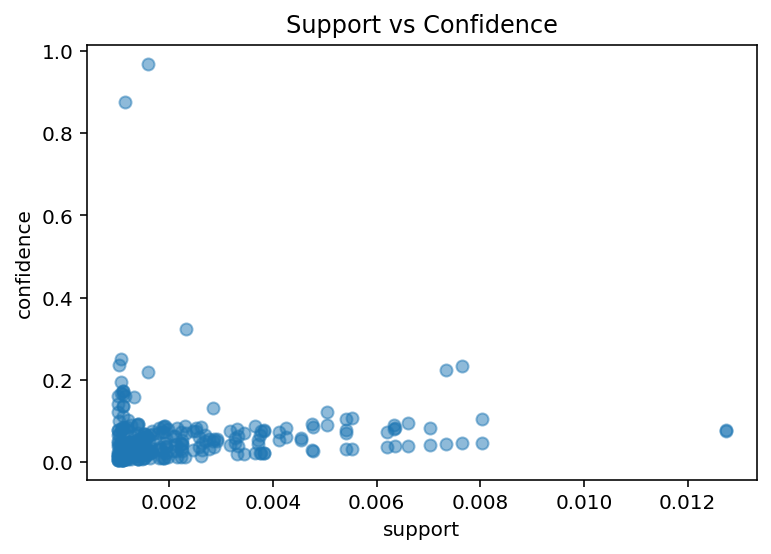

In [86]:
#Support vs Confidence

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

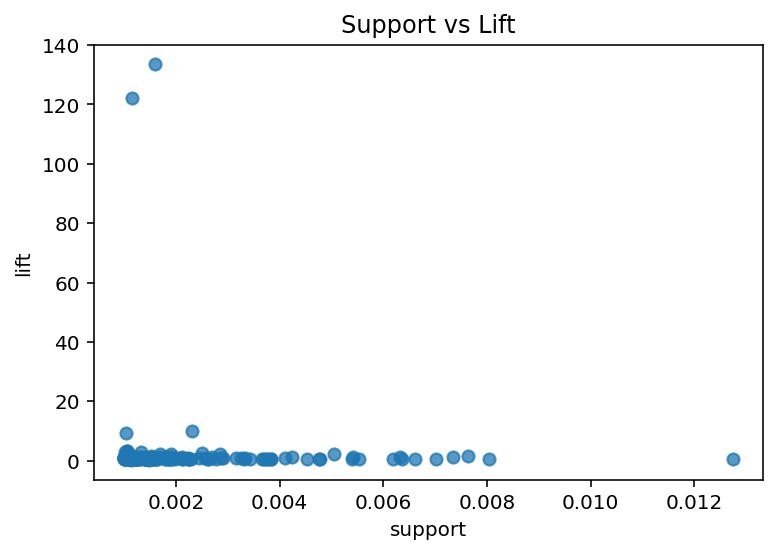

In [87]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

In [ ]:
from PyARMViz import datasets
from PyARMViz import PyARMViz